<a href="https://colab.research.google.com/github/HopesofApril/Grass/blob/main/Week3_level1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **[실습 전 강의 예제 풀어보기]**


---


**iris dataset**

- 붓꽃 데이터. 꽃잎의 각 부분의 너비, 길이 등을 측정한 데이터

- 150개의 데이터와 6개의 필드로 구성






In [144]:
import pandas as pd
from sklearn.datasets import load_iris #붓꽃데이터 로드
iris=load_iris()
print(iris['DESCR']) #DESCR로 데이터셋의 정보를 보여줌.

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [145]:
data=iris['data'] #각 배열 속 구성을 확인할 수 있음
data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [146]:
feature_names = iris['feature_names'] #data의 컬럼 이름을 확인할 수 있음
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [147]:
target = iris['target']
target #클래스가 3개임을 확인할 수 있음

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [148]:
iris['target_names'] #클래스의 이름을 확인할 수 있음.

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [149]:
#pandas의 데이터프레임을 이용해 데이터와 컬럼명, 라벨데이터(클래스)를 추가하여 iris 데이터 프레임을 완성한다.
df_iris=pd.DataFrame(data,columns=feature_names)  #데이터프레임을 만들건데, column에는 iris 데이터셋의 feature_name이 들어갈거야.
df_iris['target']=target #라벨데이터 추가(target컬럼 추가)
df_iris.head() #head()메서드를 통해 데이터프레임의 앞 부분의 일부 확인 가능

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0




---


### **[예제 1] iris 데이터셋을 로지스틱 회귀 모델에 학습시켜, 꽃받침 너비 데이터만으로 가상의 데이터 1000개가 virginica 종일 확률과 아닌 확률 구해보기**


---



In [150]:
from sklearn import datasets
iris=datasets.load_iris()

#변수 할당
x=iris['data'][:,3:] #꽃받침의 너비 변수만 사용
y=(iris['target']==2).astype('int') #virginica 종만 사용, virginica면 1로 나타내고 그 외의 종은 0으로 나타냄. / astype메서드를 활용하여 데이터프레임 타입을 int타입으로 변경

#로지스틱 회귀 모델 가져와서 학습 시키기
from sklearn.linear_model import LogisticRegression
log_leg=LogisticRegression() #객체화 시켜서 log_leg에 할당
log_leg.fit(x,y) #데이터 학습

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [151]:
#예측해보기
import numpy as np
import matplotlib.pyplot as plt

x_new=np.linspace(0,3,1000).reshape(-1, 1) #0부터 3까지 일정한 간격으로 가상의 데이터 1000개 만들기 / reshape(-1, 정수) 일 경우 열차원의 정수에 따라 빠짐없이 배치됨.
y_proba=log_leg.predict_log_proba(x_new) #생성한 가상의 데이터가 virginica일 확률, 아닐 확률 알아보기
y_proba

array([[-7.50265467e-04, -7.19545857e+00],
       [-7.60088181e-04, -7.18245612e+00],
       [-7.70039448e-04, -7.16945381e+00],
       ...,
       [-5.78160947e+00, -3.08851276e-03],
       [-5.79458187e+00, -3.04864536e-03],
       [-5.80755478e+00, -3.00929180e-03]])

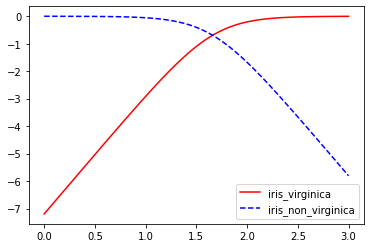

In [152]:
#시각화
plt.plot(x_new, y_proba[:,1], 'r-', label='iris_virginica')
plt.plot(x_new, y_proba[:,0], 'b--', label='iris_non_virginica')
plt.legend()
plt.show()



---

### **[예제 확인]**
 **iris 데이터셋을 로지스틱 회귀 모델에 학습시켜, 0부터 3사이에 일정한 간격으로 생성된 가상의 데이터 1000개가 setosa종일 확률과 아닌 확률 구해보기**

 아래 코드를 보고 빈칸을 채워가며 확인해보세요:)

---



In [153]:
#iris 데이터셋 불러오기
from sklearn import datasets
iris=datasets.load_iris()

In [154]:
#변수 할당
x=iris['data'][:,3:] #꽃받침의 너비 변수만 사용
y=(iris['target']==0).astype('int')

In [155]:
#로지스틱 회귀 모델 불러와 학습시키기
from sklearn.linear_model import LogisticRegression
log_leg=LogisticRegression()
log_leg.fit(x,y) #데이터 학습

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [156]:
#예측해보기
import numpy as np
import matplotlib.pyplot as plt

x_new_2=np.linspace(0,3,1000).reshape(-1, 1)
y_proba_2=log_leg.predict_log_proba(x_new) 
y_proba_2

array([[-3.45241171e+00, -3.21814809e-02],
       [-3.43923601e+00, -3.26153362e-02],
       [-3.42606607e+00, -3.30549444e-02],
       ...,
       [-3.91342402e-05, -1.01485323e+01],
       [-3.86052588e-05, -1.01621414e+01],
       [-3.80834275e-05, -1.01757504e+01]])

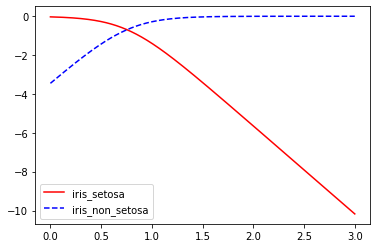

In [157]:
#시각화
plt.plot(x_new_2, y_proba_2[:,1], 'r-', label='iris_setosa')
plt.plot(x_new_2, y_proba_2[:,0], 'b--', label='iris_non_setosa')
plt.legend()
plt.show()


---


### **[예제 2] iris 데이터셋을 소프트맥스 회귀 모델에 학습시켜 꽃받침 길이, 너비 데이터로 어떤 붓꽃 종인지 가상의 데이터를 만들어서 예측해보기**


---

In [158]:
from sklearn import datasets
iris=datasets.load_iris()

#변수 할당
x=iris['data'][:,(2,3)] #꽃받침의 길이, 너비 데이터 사용
y=iris['target'] #3개 종 모두 사용

#소프트맥스 모델 가져와서 학습시키기
from sklearn.linear_model import LogisticRegression
softmax_reg=LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10, random_state=0) 
softmax_reg.fit(x,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [159]:
#가상데이터를 만들어서 예측해보기
new_iris=[[5,2]] #꽃잎의 길이가 5, 너비가 2인 붓꽃은 어떤 종일까?
prediction=softmax_reg.predict(new_iris)[0]
label=iris['target_names'].tolist() #타겟이름을 리스트로 변환
print(label[prediction])

virginica



---

### **[예제 확인]**
 **iris 데이터셋을 소프트맥스 모델에 학습시켜 꽃받침의 길이가 3.3이고, 너비가 2.1인 붓꽃은 어떤 붓꽃 종인기 가상의 데이터를 만들어서 예측해보기**

 아래 코드를 보고 빈칸을 채워가며 확인해보세요:)

---



In [160]:
#데이터셋 import
from sklearn import datasets
iris=datasets.load_iris()

In [161]:
#변수 할당
x= iris['data'][:,(2,3)]
y= iris['target']

In [162]:
#소프트맥스 모델 가져와서 학습시키기
from sklearn.linear_model import LogisticRegression
softmax_reg=LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10, random_state=0) 
softmax_reg.fit(x,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [163]:
#가상데이터를 만들어서 예측해보기
new_iris=[[3.3,2.1]]
prediction = softmax_reg.predict(new_iris)[0]
label=iris['target_names'].tolist() 
print(label[prediction])

versicolor




---


### **[응용 실습 문제]**
**타이타닉 생존자 예측**

캐글에서는 타이타닉 데이터를 제공한다. 해당 데이터와 로지스틱 회귀를 활용하여, 승객들의 생존 여부를 예측해보자.



---



<details>
<summary>데이터셋은 어떻게 이루어져 있을까요?</summary>
<div markdown="1">       

 - 해당 데이터에는 승객들 명단과 각각의 특징이 데이터셋으로 주어집니다.

 - 해당 데이터셋은 train_data와 test_data로 구분되어 있습니다.


 - **Data Dictionary**

   - Survived: 0=사망, 1=생존

   - Pclass: 1=1등석, 2=2등석, 3=3등석

   - Sex: female=여성, male=남성

   - Age: 나이

   - SibSp: 동승한 자매/배우자의 수

   - Parch: 동승한 부모/자식의 수

   - Ticket: 티켓 번호

   - Fare: 승객 요금 

   - Cabin: 방 호수

   - Embarked: 탑승지, C=셰르부르, Q=퀸즈타운, S=사우샘프턴







> 문제 해결 단계를 작성하면 코드 짜기가 수월해요. 


1. 사용할 라이브러리 import

2. 데이터셋 불러오기

3. 데이터셋이 어떻게 생겼는지 확인해보기

4. 타겟 데이터를 어떤 걸로 할지 결정하기

5. 데이터에 null값이 있는지 확인해보기

6. 모델을 훈련하는데 불필요한 데이터 삭제하기

7. 문자로 저장되어 있는 데이터를 숫자로 변환하기

8. 훈련 데이터로 로지스틱 모델 훈련

9. 예측 결과 출력

10. 가상의 승객 A가 탑승했을 경우 생존여부를 판단

(제가 임의로 짜둔 단계입니다. 본인이 생각하는 흐름에 맞추어 단계를 새로 짜보세요!)



In [185]:
#사용할 라이브러리 import
import pandas as pd
import numpy as np

<details>

---


<summary>어떤 라이브러리가 필요할까요?</summary>
<div markdown="1">       

 - 캐글의 csv 파일 가져오기 --> 판다스의 read_csv()메서드 이용 --> import pandas

 - 데이터프레임과 연산 필요 --> import numpy

In [186]:
#데이터셋 불러오기
train_set = pd.read_csv('train.csv')

#데이터셋이 어떻게 생겼는지 확인해보기
train_set.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [187]:
test_set = pd.read_csv('test.csv')
test_set.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


<details>

---


<summary>데이터셋을 불러오고, 어떤 데이터가 있는지 어떻게 확인할까요?</summary>
<div markdown="1">       

 - csv파일로 되어 있는 데이터셋을 읽어오기 위해서 다양한 코드를 활용할 수 있음.
 
 --> 판다스의 pandas.read_csv()를 사용하면 csv파일을 깔끔하게 가져올 수 있음.

 - data.head(n)를 사용하면 앞 n개의 데이터를 보여줌.

In [188]:
#데이터에 null 값이 있는지 확인하기
train_set.isnull().sum()
test_set.isnull().sum()

#null값을 어떤 식으로 처리할지 고민해보기
train_set.fillna("S")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...
709,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,S,Q
710,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,S
711,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
712,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<details>

---


<summary>데이터에 null값이 있는지는 어떻게 확인할까요?</summary>
<div markdown="1">       

 - 데이터셋명.isna().sum() 메서드를 이용하면, null값의 개수를 알 수 있음.

 - null값이 있는 경우 처리 방법: null값을 전부 삭제 / 평균값 등으로 채워주기 / 예측하여 채워주기

In [189]:
#타겟 데이터 변수 할당

#타겟 데이터 따로 저장
target_sur = train_set['Survived']

#타겟데이터와 불필요데이터 삭제
train_set.drop(labels=['Name'],axis=1,inplace=True)
train_set.drop(labels=['Cabin'],axis=1,inplace=True)
train_set.drop(labels=['Fare'],axis=1,inplace=True)
train_set.drop(labels=['Ticket'],axis=1,inplace=True)
train_set.drop(labels=['Embarked'],axis=1,inplace=True)
train_set.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0


<details>

---


<summary>타겟 데이터를 따로 저장하는 방법은?</summary>
<div markdown="1">       

 - 변수 = 데이터명['라벨명'] 으로 타겟 데이터를 따로 저장 할 수 있음.

 - 어떤 데이터를 타겟 데이터로 해야할지 생각해야 함.

 - 불필요한 데이터를 삭제하는 방법: 데이터명.drop(labels=['라벨명'], axis=1, inplace=True) 

In [190]:
#성별 데이터를 숫자로 변환
train_set['Sex'] = train_set['Sex'].map({"female":"1","male":"2"})

#입력 데이터가 제대로 준비되었는지 확인
train_set

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,2,22.0,1,0
1,2,1,1,1,38.0,1,0
2,3,1,3,1,26.0,0,0
3,4,1,1,1,35.0,1,0
4,5,0,3,2,35.0,0,0
...,...,...,...,...,...,...,...
709,886,0,3,1,39.0,0,5
710,887,0,2,2,27.0,0,0
711,888,1,1,1,19.0,0,0
712,890,1,1,2,26.0,0,0


<details>

---


<summary>텍스트 데이터를 숫자 데이터로 변환하는 방법?</summary>
<div markdown="1">       

 - int type으로 변경하는 코드는 다양함.

 - 성별 데이터가 텍스트 데이터로 되어 있으므로, 이를 숫자로 변환시키는 작업 필요

 - 소학회장은 데이터명['라벨명']=데이터명['라벨명'].map({"변경시킬 텍스트1":숫자1, "변경시킬 텍스트2":숫자2}) 메서드를 사용했어요~!

In [191]:
x_train = train_set.drop(labels=['Survived'],axis=1)

x_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,1,3,2,22.0,1,0
1,2,1,1,38.0,1,0
2,3,3,1,26.0,0,0
3,4,1,1,35.0,1,0
4,5,3,2,35.0,0,0
...,...,...,...,...,...,...
709,886,3,1,39.0,0,5
710,887,2,2,27.0,0,0
711,888,1,1,19.0,0,0
712,890,1,2,26.0,0,0


In [192]:
#타겟데이터와 불필요데이터 삭제
test_set.drop(labels=['Name'],axis=1,inplace=True)
test_set.drop(labels=['Cabin'],axis=1,inplace=True)
test_set.drop(labels=['Fare'],axis=1,inplace=True)
test_set.drop(labels=['Ticket'],axis=1,inplace=True)
test_set.drop(labels=['Embarked'],axis=1,inplace=True)
test_set.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,male,34.5,0,0
1,893,3,female,47.0,1,0
2,894,2,male,62.0,0,0
3,895,3,male,27.0,0,0
4,896,3,female,22.0,1,1


In [193]:
#성별 데이터를 숫자로 변환
test_set['Sex'] = test_set['Sex'].map({"female":"1","male":"2"})

#입력 데이터가 제대로 준비되었는지 확인
test_set

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,2,34.5,0,0
1,893,3,1,47.0,1,0
2,894,2,2,62.0,0,0
3,895,3,2,27.0,0,0
4,896,3,1,22.0,1,1
...,...,...,...,...,...,...
327,1301,3,1,3.0,1,1
328,1303,1,1,37.0,1,0
329,1304,3,1,28.0,0,0
330,1306,1,1,39.0,0,0


In [194]:
#로지스틱 회귀 모델 생성 후 모델 훈련
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,target_sur)

#예측 결과 출력
lr.predict(test_set)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,

<details>

---


<summary>로지스틱 회귀 모델 생성 방법!</summary>
<div markdown="1">       

 - from sklearn.linear_model import LogisticRegression 으로 로지스틱 회귀 모델을 불러와주세요!

 - fit(x, y) 로 데이터를 학습시켜요.

In [204]:
#가상의 승객이 탑승하였을 때 조건을 가정하여 생존확률을 예측
tt = lr.predict([[100,1,1,20,1,2]])
if tt == 1:
  print("생존")
else:
  print("사망")

생존
